# Lista 4
#### Zuzanna Sosnowska

In [79]:
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import pandas as pd
import numpy as np

### Zadanie 1

In [80]:
def bisection_method(function,x1,x2,tol=1.0e-9):
    """
    Funkcja oblicza miejsca zerowe funkcji metodą bisekcji.
    :param function: Funkcja, której miejsc zerowych szukamy
    :param x1: Lewy kraniec przedziału, w którym szukamy miejsca zerowego
    :param x2: Prawy kraniec przedziału, w którym szukamy miejsca zerowego
    :param tol: Dopuszczalny błąd numeryczny
    :return: Funkcja zwraca tuple - jego pierwsza wartość to szukany pierwiastek, druga to liczba iteracji potrzebna do uzyskania wyniku o zadanej dokładności a trzecia to liczba mnożeń i dodawań wykonana do obliczenia miejsca zerowego
    """
    operations = 0
    f1 = function(x1)
    f2 = function(x2)
    if f1 == 0.0: 
        return x1
    if f2 == 0.0: 
        return x2
    if np.sign(f1) == np.sign(f2):
        raise ValueError('Wrong x1 and x2')
    # Obliczanie liczby iteracji potrzebnych do uzyskania odpowiedniej dokładności
    n = int(np.ceil(np.log(abs(x2 - x1) / tol) / np.log(2.0)))
    operations += 3
    for i in range(n):
        x3 = 0.5 * (x1 + x2)
        operations += 2
        f3 = function(x3)
        if (np.abs(f3) > np.abs(f1)) and (np.abs(f3) > np.abs(f2)):
            return None
        if f3 == 0.0: 
            return x3
        if np.sign(f2)!= np.sign(f3): 
            x1 = x3
            f1 = f3
        else: 
            x2 = x3
            f2 = f3
    return (x1 + x2) / 2.0, n, operations


def brent_method(function, x1, x2, tol=1e-8, max_iter=100):
    """
    Metoda Brenta do znajdowania pierwiastków funkcji f na przedziale [a, b]. Wykorzystuje algorytm ze strony: https://en.wikipedia.org/wiki/Brent%27s_method#Algorithm
    :param function: Funkcja, której pierwiastek szukamy
    :param x1: Początek przedziału
    :param x2: Koniec przedziału
    :param tol: Dokładność rozwiązania
    :param max_iter: Maksymalna liczba iteracji
    :return: Funkcja zwraca tuple - jego pierwsza wartość to przybliżony pierwiastek, druga to liczba iteracji potrzebnych do obliczenia teo pierwiastka, a trzecia to liczba wykonanych mnożeń i dzieleń
    """
    operations = 0
    f_x1 = function(x1)
    f_x2 = function(x2)

    operations += 1
    if f_x1 * f_x2 > 0:
        raise ValueError("The function must have opposite signs at the endpoints a and b.")

    # Initialization
    if abs(f_x1) < abs(f_x2):
        x1, x2 = x2, x1
        f_x1, f_x2 = f_x2, f_x1

    x3 = x1
    f_x3 = f_x1
    x4 = x2
    x5 = None
    mflag = True

    for i in range(max_iter):
        if f_x2 != f_x3 and f_x1 != f_x3:
            # Odwrotna interpolacja kwadratowa (za pomocą paraboli przechodzącej przez punkty (x1, f_x1), (x2, f_x2), (x3, f_x3)
            x4 = (x1 * f_x2 * f_x3 / ((f_x1 - f_x2) * (f_x1 - f_x3)) +
                 x2 * f_x1 * f_x3 / ((f_x2 - f_x1) * (f_x2 - f_x3)) +
                 x3 * f_x1 * f_x2 / ((f_x3 - f_x1) * (f_x3 - f_x2)))
            operations += 20
        else:
            # Metoda siecznych
            x4 = x2 - f_x2 * (x2 - x1) / (f_x2 - f_x1)
            operations += 5

        # Warunki do odwrotnej bisekcji
        cond1 = (x4 < (3 * x1 + x2) / 4 or x4 > x2)
        cond2 = mflag and abs(x4 - x2) >= abs(x2 - x3) / 2
        cond3 = not mflag and abs(x4 - x2) >= abs(x3 - x5) / 2
        cond4 = mflag and abs(x2 - x3) < tol
        cond5 = not mflag and abs(x3 - x5) < tol

        operations += 11

        if cond1 or cond2 or cond3 or cond4 or cond5:
            # Bisekcja
            x4 = (x1 + x2) / 2
            mflag = True
            operations += 2
        else:
            mflag = False

        f_x4 = function(x4)
        x5 = x3
        x3 = x2
        f_x3 = f_x2

        operations += 1
        if f_x1 * f_x4 < 0:
            x2 = x4
            f_x2 = f_x4
        else:
            x1 = x4
            f_x1 = f_x4

        if abs(f_x1) < abs(f_x2):
            x1, x2 = x2, x1
            f_x1, f_x2 = f_x2, f_x1

        operations += 1
        # Sprawdzanie warunków wyjścia z pętli
        if abs(x2 - x1) < tol or abs(f_x2) < tol:
            return x2, i, operations

    raise ValueError("Brent's method did not converge within the maximum number of iterations.")


def secant_method(function, x1, x2, tol=1.0e-9, max_iter=2000):
    """
    Funkcja zwraca miejsca zerowe zadanej funkcji obliczone za pomocą metody siecznych.
    :param function: Funkcja, której miejsc zerowych szukamy
    :param x1: Lewy kraniec przedziału, w którym szukamy miejsca zerowego
    :param x2: Prawy kraniec przedziału, w którym szukamy miejsca zerowego
    :param tol: Dopuszczalny błąd numeryczny
    :return: Funkcja zwraca tuple - jego pierwsza wartość to szukany pierwiastek, druga to liczba iteracji potrzebna do uzyskania wyniku o zadanej dokładności a trzecia to liczba mnożeń i dodawań wykonana do obliczenia miejsca zerowego 
    """
    operations = 0
    for i in range(max_iter):
        f_x1 = function(x1)
        f_x2 = function(x2)
        if f_x2 - f_x1 == 0:
            raise ZeroDivisionError("Function values at x0 and x1 resulted in division by zero.")
        # Sieczna przecinająca oś w punkcie x
        x_new = x2 - (f_x2 * (x2 - x1)) / (f_x2 - f_x1)
        operations += 5
        x1, x2 = x2, x_new
        if np.abs(function(x_new)) < tol:
            return float(x_new), i, operations
    raise ValueError("Secant method did not converge within the maximum number of iterations.")


def newton_method(function, derivative, x, tol=1.0e-9):
    """
    Funkcja oblicza miejsca zerowe dla zadanej funkcji przy użyciu metody Newtona
    :param function: Funkcja, której miejsc zerowych szukamy
    :param derivative: Pochodna funkcji, której miejsc zerowych szukamy
    :param x: Punkt początkowy, który po iteracyjnych poprawkach będzie dążył do pewnego miejsca zerowego funkcji.
    :param tol: Dopuszczalny błąd numeryczny
    :return: Funkcja zwraca tuple - jego pierwsza wartość to szukany pierwiastek, druga to liczba iteracji potrzebna do uzyskania wyniku o zadanej dokładności a trzecia to liczba mnożeń i dodawań wykonana do obliczenia miejsca zerowego 
    """
    operations = 0
    if function(x) == 0:
        return x, 0
    counter = 0
    while np.abs(function(x)) > tol:
        x = x - function(x) / derivative(x)
        operations += 2
        counter += 1
    return x, counter, operations

In [110]:
def f(x): return np.tan(np.pi - x) - x
def df(x): return - 1 / np.power(np.cos(np.pi - x), 2) - 1


x0 = 2.0
bracket_values = [2, 3]
accuracy = 1.0e-9

def generate_table(function, derivative, x, bracket, tolerance):
    """
    Funkcja tworzy dwie tabele z wartościami do porównania metod obliczania miejsc zerowych. W pierwszej tabeli znajdują się miejsca zerowe obliczone przy użyciu funkcji samodzielnie zaimplementowanych, natomiast w drugiej tabeli znajdują się miejsca zerowe obliczone za pomocą funkcji z biblioteki scipy.
    :param function: Funkcja, której miejsca zerowego szukamy.
    :param derivative: Pochodna funkcji, której miejsca zerowego szukamy
    :param x: Punkt początkowy (do metody newtona), który po iteracyjnych poprawkach będzie dążył do pewnego miejsca zerowego funkcji.
    :param bracket: Przedział, w którym szukamy miejsc zerowych (do metody bisekcji, Brenta oraz siecznych)
    :param tolerance: Dopuszczalny błąd numeryczny
    :return: Funkcja wywołuje dwie tabele z wartościami dla poszczególnych metod obliczania miejsc zerowych.
    """
    # Wyniki dla metod
    bisection = bisection_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    brent = brent_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    secant = secant_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    newton = newton_method(function=function, derivative=derivative, x=x, tol=tolerance)

    # Tworzymy dane do tabeli
    data = {
        "Metoda": ["Bisekcja", "M. Brenta", "M. Siecznych", "M. Newtona"],
        "x": [bisection[0], brent[0], secant[0], newton[0]],
        "f(x)": [function(bisection[0]), function(brent[0]), function(secant[0]), function(newton[0])],
        "liczba iteracji": [bisection[1], brent[1], secant[1], newton[1]],
        "liczba mnożeń i dodawań": [bisection[2], brent[2], secant[2], newton[2]]
    }

    # Tworzymy DataFrame z danych
    df = pd.DataFrame(data)

    # Wyświetlamy tabelę
    display(df)

    # Wyniki z scipy.optimize.root_scalar
    sp_bisection = root_scalar(f=function, bracket=bracket, method="bisect", xtol=tolerance)
    sp_brent = root_scalar(f=function, bracket=bracket, method="brentq", xtol=tolerance)
    sp_secant = root_scalar(f=function, x0=bracket[0], x1=bracket[1], method="secant", rtol=tolerance)
    sp_newton = root_scalar(f=function, x0=x, fprime=derivative, method="newton", xtol=tolerance)

    # Tworzymy dane dla wyników scipy.optimize.root_scalar
    sp_data = {
        "Scipy": ["Bisekcja", "M. Brenta", "M. Siecznych", "M. Newtona"],
        "x": [sp_bisection.root, sp_brent.root, sp_secant.root, sp_newton.root],
        "f(x)": [function(sp_bisection.root), function(sp_brent.root), function(sp_secant.root), function(sp_newton.root)],
        "liczba iteracji": [sp_bisection.iterations, sp_brent.iterations, sp_secant.iterations, sp_newton.iterations]
    }

    # Tworzymy DataFrame z wyników scipy.optimize.root_scalar

    sp_df = pd.DataFrame(sp_data)

    # Wyświetlamy tabelę
    display(sp_df)
   

generate_table(function=f, derivative=df, x=x0, bracket=bracket_values, tolerance=accuracy)

,Metoda,x,f(x),liczba iteracji,liczba mnożeń i dodawań
0,Bisekcja,2.028758,2.676717e-10,30,63
1,M. Brenta,2.028758,-2.664535e-15,19,410
2,M. Siecznych,2.028758,-3.505360e-10,5,30
3,M. Newtona,2.028758,1.300635e-10,3,6


,Scipy,x,f(x),liczba iteracji
0,Bisekcja,2.028758,3.115590e-09,30
1,M. Brenta,2.028758,-5.882406e-12,7
2,M. Siecznych,2.028758,0.000000e+00,7
3,M. Newtona,2.028758,0.000000e+00,4


### Zadanie 2

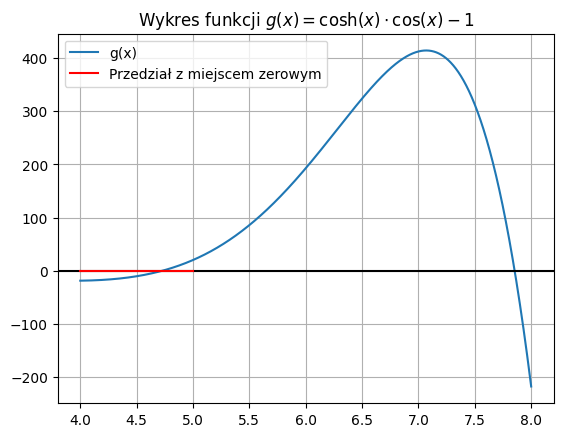

,Metoda,x,f(x),liczba iteracji,liczba mnożeń i dodawań
0,Bisekcja,4.730041,-2.594127e-08,30,63
1,M. Brenta,4.730041,-9.520188e-10,13,290
2,M. Siecznych,4.730041,-3.181022e-11,6,35
3,M. Newtona,10.995608,1.163403e-11,7,14


,Scipy,x,f(x),liczba iteracji
0,Bisekcja,4.730041,9.020178e-10,30
1,M. Brenta,4.730041,-6.517675e-12,8
2,M. Siecznych,4.730041,3.574918e-14,8
3,M. Newtona,10.995608,1.163403e-11,7


In [82]:
def cosh(x): return (np.exp(x) + np.exp(-x)) / 2


def sinh(x): return (np.exp(x) - np.exp(-x)) / 2


def g(x): return cosh(x) * np.cos(x) - 1


def dg(x): return sinh(x) * np.cos(x) - cosh(x) * np.sin(x)


x0 = 4.0
bracket_values = [4.0, 5.0]

x_values = np.linspace(x0, 8, 10000)
y_values = g(x_values)

plt.plot(x_values, y_values, label='g(x)')
plt.axhline(y=0, color='black')
plt.plot((4.0, 5.0), (0.0, 0.0), color='red', label="Przedział z miejscem zerowym")
plt.title(r"Wykres funkcji $g(x) = \cosh(x)\cdot\cos(x) - 1$")
plt.grid(True)
plt.legend()
plt.show()


# Tworzenie tabeli z wartościami obliczonymi poszczególnymi metodami
generate_table(function=g, derivative=dg, x=x0, bracket=bracket_values, tolerance=accuracy)

### Zadanie 3

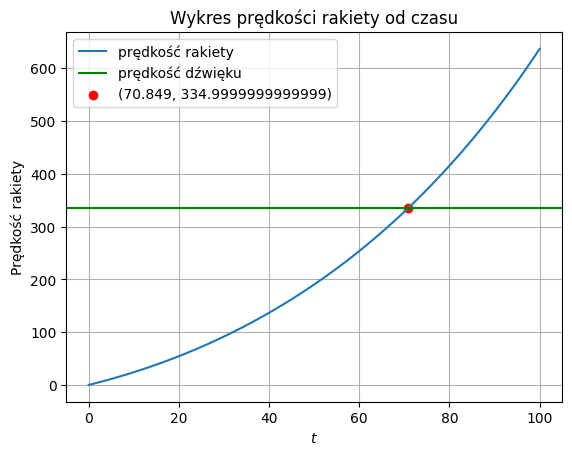

,Metoda,x,f(x),liczba iteracji,liczba mnożeń i dodawań
0,Bisekcja,70.848893,1.783405e-09,37,77
1,M. Brenta,70.848893,-1.136868e-13,28,571
2,M. Siecznych,70.848893,-1.136868e-13,6,35
3,M. Newtona,70.848893,-1.136868e-13,7,14


,Scipy,x,f(x),liczba iteracji
0,Bisekcja,70.848893,-1.186322e-09,37
1,M. Brenta,70.848893,5.570655e-12,8
2,M. Siecznych,70.848893,1.136868e-13,8
3,M. Newtona,70.848893,1.136868e-13,8


In [83]:
from scipy.constants import g


def h(t):
    u = 2510
    M0 = 2.8 * 10 ** 6
    m = 13.3 * 10 ** 3
    return u * np.log(M0 / (M0 - m * t)) - g * t


def dh(t):
    u = 2510
    M0 = 2.8 * 10 ** 6
    m = 13.3 * 10 ** 3
    return u * m / (M0 - m * t) - g


v = 335
t_list = np.linspace(0, 100, 10000)
sol_brent = brent_method(lambda x: h(x) - v, 0, 100)[0]

x0 = 0
bracket_values = [0, 100]


plt.plot(t_list, h(t_list), label='prędkość rakiety')
plt.axhline(y=v, color='green', label='prędkość dźwięku')
plt.scatter(sol_brent, h(sol_brent), color='red', label=f'({np.round(sol_brent, decimals=3)}, {h(sol_brent)})')
plt.xlabel(r'$t$')
plt.ylabel('Prędkość rakiety')
plt.title('Wykres prędkości rakiety od czasu')
plt.grid(True)
plt.legend()
plt.show()

# Generowanie tabeli
generate_table(function=lambda x: h(x) - v, derivative=dh, x=x0, bracket=bracket_values, tolerance=accuracy)

Metoda Newtona nie zbiega do najmniejszego dodatniego pierwiastka (w przedziale $ (4, 5) $),  
gdy punktem startowym jest $ x_0 = 4 $, ponieważ:  

1. Pochodna $ f'(x) $ w punkcie startowym kieruje iteracje w stronę innego pierwiastka.  
2. Funkcja $ f(x) $ jest oscylacyjna i szybko rośnie, co powoduje wrażliwość na wybór punktu startowego.  
3. Metoda Newtona nie ma gwarancji zbieżności do konkretnego pierwiastka,  
   w przeciwieństwie do metod takich jak bisekcja.  


### Zadanie 4

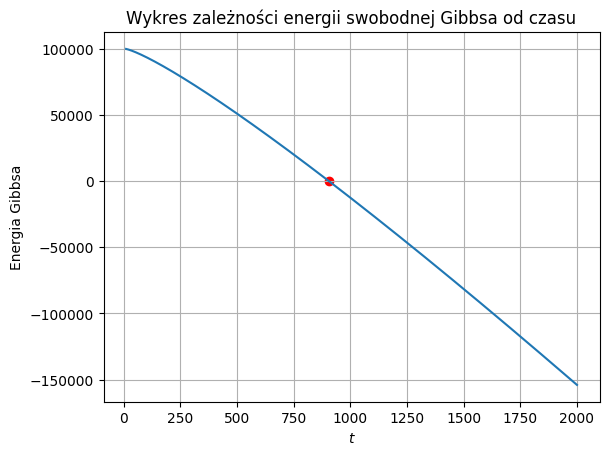

,Metoda,x,f(x),liczba iteracji,liczba mnożeń i dodawań
0,Bisekcja,904.937763,-1.990702e-08,44,91
1,M. Brenta,904.937763,2.382149e-08,36,735
2,M. Siecznych,904.937763,-1.455192e-10,5,30


,Scipy,x,f(x),liczba iteracji
0,Bisekcja,904.937763,1.736043e-08,44
1,M. Brenta,904.937763,1.455192e-11,8
2,M. Siecznych,904.937763,0.000000e+00,7


In [88]:
from scipy.constants import R


def gibbs_free_energy(T): return -R * T * 2.5 * np.log(T / T0) + 1e5


T0 = 4.44418
G = -1e5
acc = 1.0e-9

x0 = 900
bracket_values = [10, 10000]

t_list = np.linspace(10, 2000, 10000)
values = gibbs_free_energy(t_list)
solution = brent_method(gibbs_free_energy, 10, 10000)[0]

plt.plot(t_list, values)
plt.scatter(solution, gibbs_free_energy(solution), color="red")
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel('Energia Gibbsa')
plt.title("Wykres zależności energii swobodnej Gibbsa od czasu")
plt.show()

# Funkcja tworzy analogiczne tabele dla zadania 4
def create_table_for_ex4(function,  bracket, tolerance):
    # Wyniki dla metod
    bisection = bisection_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    brent = brent_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    secant = secant_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)

    # Tworzymy dane do tabeli
    data = {
        "Metoda": ["Bisekcja", "M. Brenta", "M. Siecznych"],
        "x": [bisection[0], brent[0], secant[0]],
        "f(x)": [function(bisection[0]), function(brent[0]), function(secant[0])],
        "liczba iteracji": [bisection[1], brent[1], secant[1]],
        "liczba mnożeń i dodawań": [bisection[2], brent[2], secant[2]]
    }

    # Tworzymy DataFrame z danych
    df = pd.DataFrame(data)

    # Wyświetlamy tabelę
    display(df)

    # Wyniki z root_scalar
    sp_bisection = root_scalar(f=function, bracket=bracket, method="bisect", xtol=tolerance)
    sp_brent = root_scalar(f=function, bracket=bracket, method="brentq", xtol=tolerance)
    sp_secant = root_scalar(f=function, x0=bracket[0], x1=bracket[1], method="secant", rtol=tolerance)

    # Tworzymy dane dla wyników root_scalar
    sp_data = {
        "Scipy": ["Bisekcja", "M. Brenta", "M. Siecznych"],
        "x": [sp_bisection.root, sp_brent.root, sp_secant.root],
        "f(x)": [function(sp_bisection.root), function(sp_brent.root), function(sp_secant.root)],
        "liczba iteracji": [sp_bisection.iterations, sp_brent.iterations, sp_secant.iterations]
    }

    # Tworzymy DataFrame z wyników root_scalar
    sp_df = pd.DataFrame(sp_data)

    # Wyświetlamy tabelę
    display(sp_df)
    
create_table_for_ex4(function=gibbs_free_energy, bracket=bracket_values, tolerance=acc)

### Zadanie 5

##### Rozwiązanie układu równań

Rozważmy układ równań:

$$\tan(x) - y = 1$$  

$$\cos(x) - 3 \cdot \sin(y) = 0$$  

#### Przekształcenie pierwszego równania:
Z pierwszego równania wyznaczamy $y$ jako funkcję $x$:

$$y = \tan(x) - 1$$  

#### Przekształcenie drugiego równania:
Z drugiego równania wyznaczamy $\sin(y)$ jako funkcję $\cos(x)$:

$$\sin(y) = \frac{\cos(x)}{3}$$  

Wartość $\frac{\cos(x)}{3}$ musi należeć do przedziału $[-1, 1]$, ponieważ $\sin(y)$ jest zdefiniowane tylko w tym zakresie. Dlatego:
$$
-1 \leq \frac{\cos(x)}{3} \leq 1 \quad \implies \quad -3 \leq \cos(x) \leq 3.
$$

Dla funkcji $\cos(x)$, której wartości leżą w przedziale $[-1, 1]$ dla $x \in [0, 1]$, mamy gwarancję, że $\sin(y)$ pozostaje w zakresie $[-1, 1]$.  
Z tego wynika, że każde $x \in [0, 1]$ jest dopuszczalne.

Następnie, dla każdego $x$, $y$ jest określone jako:
$$
y = \arcsin\left(\frac{\cos(x)}{3}\right).
$$

Powyższe rozwiązanie można wykorzystać do narysowania wykresu równania w przedziałach $x \in [0, 1]$ oraz $y \in [0, 5]$.

Rozwiązania nieliniowego układu równań: [0.88159259 0.21359471]
tan(x) - y = 1.000000000000009
cos(x) - 3sin(y) =  -8.881784197001252e-16


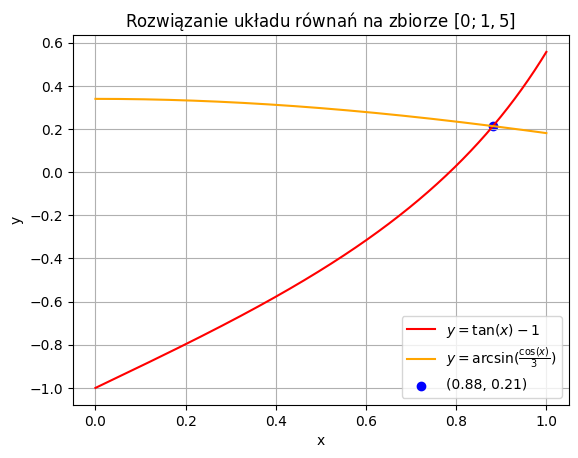

In [107]:
def norm(x): return np.sqrt(np.sum(x**2))

def newton_modified_method(f_func, f_der, g_func, g_der, x, tol=1.0e-9):
    """
    Funkcja rozwiązuje nieliniowy układ dwóch równań z zadaną tolerancją dla zadanych parametrów.
    :param f_func: Pierwsza funkcja zmiennych x i y, której miejsc zerowych szukamy; jest ona wyznaczona przez przeniesienie wszystkich niewiadomych na jedną stronę równania.
    :param f_der: Pochodna pierwszej funkcji.
    :param g_func: Druga funkcja zmiennych x i y, której miejsc zerowych szukamy; jest ona wyznaczona przez przeniesienie wszystkich niewiadomych na jedną stronę równania.
    :param g_der: pochodna drugiej funkcji.
    :param x: Wektor początkowy, który iteracyjnie dążył będzie do rozwiązania układu równań nieliniowych.
    :param tol: Dopuszczalny błąd przybliżenia.
    :return: Funkcja zwraca wektor rozwiązań układu równań nieliniowych, gdzie pierwsza wartość to x a druga to y.
    """
    if f_func(*x) == 0 and g_func(*x) == 0:
        return x
    x_new = x
    while True:
        # iteracyjne poprawianie wyniku zmodyfikowaną metodą Newtona
        x_new = x_new - np.linalg.inv(np.array([f_der(*x_new), g_der(*x_new)])) @ np.array([f_func(*x_new), g_func(*x_new)])
        if norm(np.array([f_func(*x_new), g_func(*x_new)])) <= tol:
            break
    return x_new

def p(x, y): return np.tan(x) - y - 1

def dp(x, y): return [1 / np.power(np.cos(x), 2), -1]

def q(x, y): return np.cos(x) - 3 * np.sin(y)

def dq(x, y): return [-np.sin(x), -3 * np.cos(y)]

# Funkcje potrzebne do wizualizacji rozwiązań układu równań

def y1(x): return np.tan(x) - 1

def y2(x): return np.arcsin(np.cos(x) / 3)

# Rozwiązanie układu równań obliczone zmodyfikowaną metodą Newtona
sol = newton_modified_method(f_func=p, f_der=dp, g_func=q, g_der=dq, x=np.zeros(2))

print("Rozwiązania nieliniowego układu równań:", sol)
print("tan(x) - y =", p(*sol)+1)
print("cos(x) - 3sin(y) = ", q(*sol))

# Tworzenie wykresu z graficzną interpretacją rozwiązania
x_lst = np.linspace(0, 1, 10000)
y_1 = y1(x_lst)
y_2 = y2(x_lst)

plt.plot(x_lst, y_1, color="red", label=r"$y = \tan(x) - 1$")
plt.plot(x_lst, y_2, color="orange", label=r"$y = \arcsin(\frac{\cos(x)}{3})$")
# Rozwiązanie obliczone zaimplementowaną metodą Newtona.
plt.scatter(*sol, color="blue", label=f"{float(np.round(sol[0], 2)), float(np.round(sol[1], 2))}")
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"Rozwiązanie układu równań na zbiorze $[0; 1, 5]$")
plt.grid(True)
plt.legend()
plt.show()

### Zadanie 6

Pierwiastki wielomianu w(x):
(-1.0229828662226999e-16+2j)
(2-8.813080999578745e-18j)
-3j
(-7+0j)


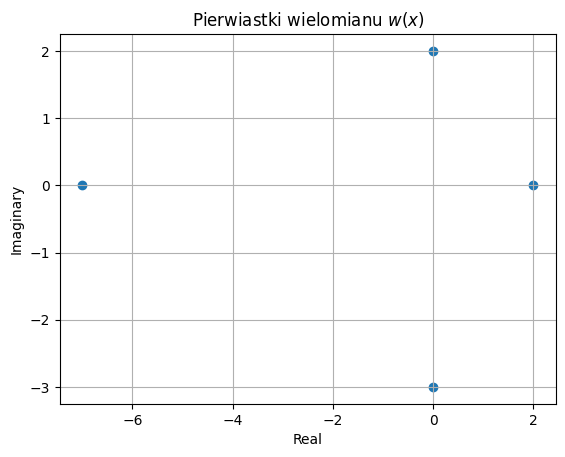

In [86]:
import cmath


def laguerre_method(coeffs, x, tol=1e-12, max_iter=100):
    """
    Funkcja oblicza pierwiastek wielomianu metodą Laguerre'a
    :param coeffs: Lista współczynników wielomianu w kolejności od współczynnika przy najwyższej
    potędze do współczynnika przy najniższej potędze
    :param x: Wartość początkowa ciągu przybliżeń
    :param tol: Tolerowany błąd
    :param max_iter: Maksymalna liczba iteracji
    :return: Pierwiastek zespolony wielomianu
    """

    n = len(coeffs) - 1  # Stopień wielomianu

    def poly_eval(coef, x_new):
        p_p = coef[0]
        dp_p = 0
        ddp_p = 0
        for c in coef[1:]:
            ddp_p = ddp_p * x_new + 2 * dp_p
            dp_p = dp_p * x_new + p_p
            p_p = p_p * x_new + c
        return p_p, dp_p, ddp_p

    for _ in range(max_iter):
        poly, dpoly, ddpoly = poly_eval(coef=coeffs, x_new=x)
        if abs(poly) < tol:
            return x

        g_p = dpoly / poly
        h_p = g_p * g_p - ddpoly / poly
        denom1 = g_p + cmath.sqrt((n - 1) * (n * h_p - g_p * g_p))
        denom2 = g_p - cmath.sqrt((n - 1) * (n * h_p - g_p * g_p))
        denom = denom1 if abs(denom1) > abs(denom2) else denom2
        x = x - n / denom

    raise ValueError("Laguerre's method did not converge within the maximum number of iterations.")


def find_all_roots(coeffs, tol=1e-12, max_iter=100):
    """
    Funkcja oblicza wszystkie pierwiastki wielomianu o zadanych współczynnikach metodą Laguerre'a.
    :param coeffs: Współczynniki wielomianu w kolejności od współczynnika przy najwyższej potędze.
    :param tol: Dopuszczalny błąd numeryczny.
    :param max_iter: Maksymalna liczba iteracji
    :return: Funkcja zwraca listę pierwiastków zadanego wielomianu.
    """
    roots = []
    coeffs = coeffs[:]  # Tworzenie kopii współczynników
    while len(coeffs) > 1:
        # Wybór początkowy pierwiastka wielomianu
        x = 0 + 0j
        root = laguerre_method(coeffs, x, tol, max_iter)
        roots.append(root)

        # Wielomian po zredukowaniu go o pierwiastek
        deflated_coeffs = []
        poly = 0
        for c in coeffs:
            deflated_coeffs.append(poly)
            poly = poly * root + c
        deflated_coeffs.pop(0)  # Usuwanie zera na początku
        # Uaktualnianie wielomianu
        coeffs = deflated_coeffs

    return roots


coefficients = [1, (5 + 1j), -(8 - 5j), (30 - 14j), -84]

root_lst = find_all_roots(coefficients)
print("Pierwiastki wielomianu w(x):")
for r in root_lst:
    print(r)
    
# Wizualizacja rozwiązań układu równań
x_lst = [ele.real for ele in root_lst] 
y_lst = [ele.imag for ele in root_lst] 
  
plt.scatter(x_lst, y_lst) 
plt.ylabel('Imaginary') 
plt.xlabel('Real') 
plt.title(r"Pierwiastki wielomianu $w(x)$")
plt.grid(True)
plt.show() 

Na przedstawionym poniżej wykresie pokazane zostały pierwiastki wielomianu obliczone przy użyciu programu WolframAlpha. Jak możemy zauważyć, pierwiastki pokrywają się ze sobą, co dowodzi poprawności zaimplementowanej metody.

<img src="plot1.PNG" alt="Wykres przedstawiający pierwiastki wielomianu obliczone przy użyciu programu Wolfram" width="600">